## Sobre os dados
O estudo será realizado sobre os Microdados de Movimentações do Cadastro Geral de Empregados e Desempregados (CAGED) disponibilizados na plataforma Base dos Dados.
Dados CAGED  no BD: https://basedosdados.org/dataset/562b56a3-0b01-4735-a049-eeac5681f056?table=2245875f-d1ef-490d-be29-4f8fb2191335

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.13.1


In [2]:
#Instalação de pacotes necessários
#!pip install pandas
#!pip install matplotlib

In [3]:
#importando a biblioteca pandas, que fornece estruturas de dados de alto desempenho e fáceis de usar, além de ferramentas de análise de dados.
import pandas as pd
print(pd.__version__)

2.2.3


In [4]:
import matplotlib.pyplot as plt

In [5]:
# Importando arquivo original para trabalho
dataset_orig = pd.read_csv('dados_iniciais.csv')

### Conhecendo o Dataset:
Conhecendo a composição do dataset e entendendo como os dados estão registrados e distribuídos.
Dessa forma, podemos identificar possíveis cenários para reduzir a nossa base de observação, além de identificar pontos de correção e ajustes para os próximos passos.

In [6]:
dataset_orig.head()

,cbo_2002,saldo_movimentacao,grau_instrucao,idade,raca_cor,sexo,tipo_movimentacao,salario_mensal,sigla_uf,ano,mes,horas_contratuais
0,212405,1,9,24.0,1,1,10,2800.0,SP,2021,1,40.0
1,212405,1,8,22.0,1,1,10,4955.0,PR,2020,1,44.0
2,212420,1,7,22.0,3,1,10,1100.0,MG,2020,1,44.0
3,212410,1,7,18.0,6,3,10,1057.0,SP,2021,1,36.0
4,212420,1,9,30.0,1,1,10,5690.0,RS,2021,1,40.0


In [7]:
print('O dataset original tem', dataset_orig.shape[0],'linhas.')

O dataset original tem 990705 linhas.


In [8]:
dataset_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990705 entries, 0 to 990704
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cbo_2002            990705 non-null  int64  
 1   saldo_movimentacao  990705 non-null  int64  
 2   grau_instrucao      990705 non-null  int64  
 3   idade               990688 non-null  float64
 4   raca_cor            990705 non-null  int64  
 5   sexo                990705 non-null  int64  
 6   tipo_movimentacao   990705 non-null  int64  
 7   salario_mensal      990654 non-null  float64
 8   sigla_uf            990705 non-null  object 
 9   ano                 990705 non-null  int64  
 10  mes                 990705 non-null  int64  
 11  horas_contratuais   990705 non-null  float64
dtypes: float64(3), int64(8), object(1)
memory usage: 90.7+ MB


📝 Observações:

1. O valor do atributo cbo_2002 está registrado como inteiro, mas da forma como é representado, deve ser interpretado como string
2. O atributo cbo_2002 pode ser classificado para otimizar o processamento
3. Os atributos idade e salario_mensal apresentam valores nulos
4. Atributos como idade e salario_mensal e horas_contratuais podem ser classificados por faixas

In [9]:
dataset_orig.nunique()

cbo_2002                  15
saldo_movimentacao         2
grau_instrucao            12
idade                     69
raca_cor                   6
sexo                       2
tipo_movimentacao         13
salario_mensal        198005
sigla_uf                  27
ano                        4
mes                       12
horas_contratuais        847
dtype: int64

## Análise e tratamento dos atributos

### cbo_2002

In [10]:
#Verificação inicial do tipo do valor
dataset_orig['cbo_2002'].dtypes

dtype('int64')

In [11]:
# Alterar a coluna 'cbo_2002' para o tipo string
dataset_orig['cbo_2002'] = dataset_orig['cbo_2002'].astype(str)

In [12]:
print(dataset_orig['cbo_2002'].dtypes)

object


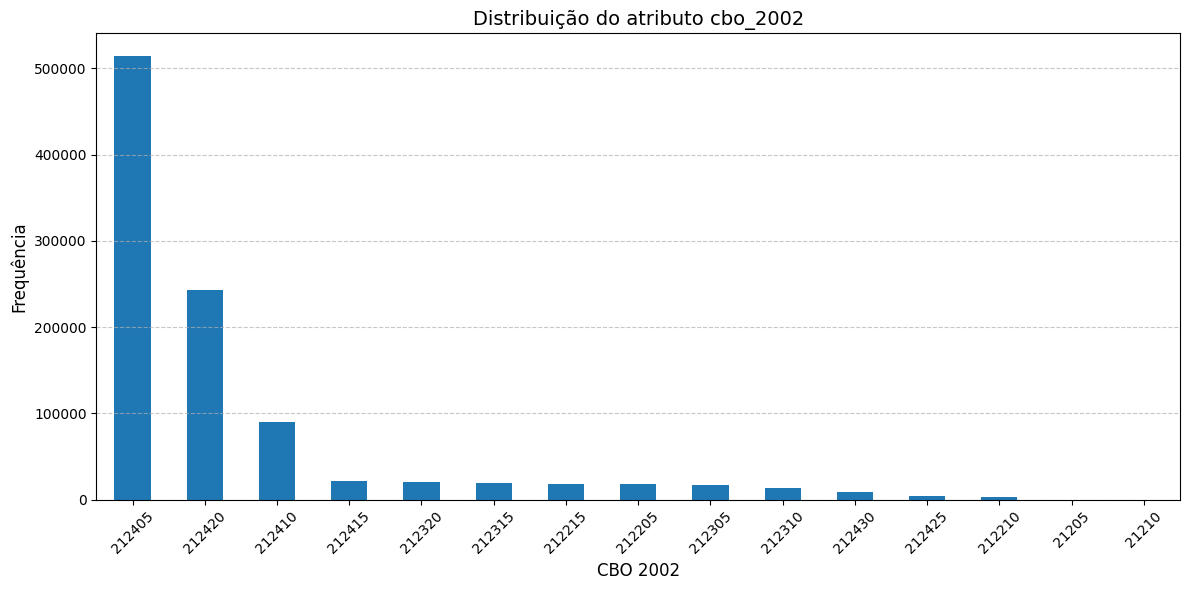

In [13]:
# Contagem dos valores
cbo_counts = dataset_orig['cbo_2002'].value_counts()

# Criar o gráfico de barras para análise de distribuição
plt.figure(figsize=(12, 6))
cbo_counts.plot(kind='bar')
plt.title('Distribuição do atributo cbo_2002', fontsize=14)
plt.xlabel('CBO 2002', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [14]:
print(cbo_counts)

cbo_2002
212405    515022
212420    243146
212410     89476
212415     21800
212320     20854
212315     18889
212215     18439
212205     18288
212305     16563
212310     12971
212430      8654
212425      3913
212210      2666
21205         23
21210          1
Name: count, dtype: int64


📝 Observações:

Códigos válidos são iniciados com os seguintes números:

2122 - Engenheiros da computação

2123 - Administradores de Tecnologia da Informação

2124 - Analistas de Tecnologia da Informação



Sendo assim, os valores que começam com uma sequência diferente das listadas acima não deveriam compor o nosso dataset.

In [15]:
#Removendo os registros inválidos através de uma máscara

mask = dataset_orig['cbo_2002'].str.startswith(('2122', '2123', '2124'))

In [16]:
#atribuindo o resultado filtrado pela máscara a uma variável (dataset revisado)

dataset_revisado = dataset_orig[mask]

In [17]:
dataset_revisado['cbo_2002'].value_counts()

cbo_2002
212405    515022
212420    243146
212410     89476
212415     21800
212320     20854
212315     18889
212215     18439
212205     18288
212305     16563
212310     12971
212430      8654
212425      3913
212210      2666
Name: count, dtype: int64

In [18]:
cat2122 = dataset_revisado['cbo_2002'].str.startswith('2122').sum()
cat2123 = dataset_revisado['cbo_2002'].str.startswith('2123').sum()
cat2124 = dataset_revisado['cbo_2002'].str.startswith('2124').sum()

print(cat2122, " - Engenheiros da computação")
print(cat2123, " - Administradores de Tecnologia da Informação")
print(cat2124, " - Analistas de Tecnologia da Informação")

39393  - Engenheiros da computação
69277  - Administradores de Tecnologia da Informação
882011  - Analistas de Tecnologia da Informação


Text(0.5, 1.0, 'Movimentação por categoria')

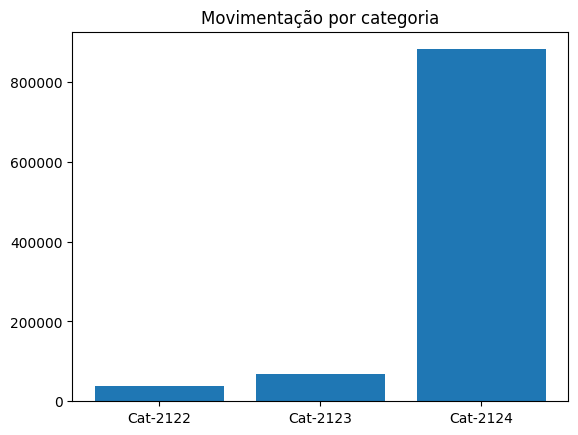

In [19]:
#Visualização do número de movimentação por categoria

categorias = ['Cat-2122', 'Cat-2123', 'Cat-2124']
dados = [cat2122, cat2123, cat2124]

plt.bar(categorias,dados)
plt.title('Movimentação por categoria')

Compreendendo que o desbalanceamento entre as categorias é significamente grande, havendo predominância de uma, e que este nível de granularidade pode impactar as análises e modelos, optei por desconsiderar este atributo, compreendendo todas as movimentações correspondentes a um único grupo profissional (profissionais de tecnologia).

In [20]:
#Removendo a categoria de atributos

dataset_revisado = dataset_revisado.drop(columns=['cbo_2002'])
dataset_revisado.head()

,saldo_movimentacao,grau_instrucao,idade,raca_cor,sexo,tipo_movimentacao,salario_mensal,sigla_uf,ano,mes,horas_contratuais
0,1,9,24.0,1,1,10,2800.0,SP,2021,1,40.0
1,1,8,22.0,1,1,10,4955.0,PR,2020,1,44.0
2,1,7,22.0,3,1,10,1100.0,MG,2020,1,44.0
3,1,7,18.0,6,3,10,1057.0,SP,2021,1,36.0
4,1,9,30.0,1,1,10,5690.0,RS,2021,1,40.0


In [21]:
dataset_revisado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990681 entries, 0 to 990704
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   saldo_movimentacao  990681 non-null  int64  
 1   grau_instrucao      990681 non-null  int64  
 2   idade               990664 non-null  float64
 3   raca_cor            990681 non-null  int64  
 4   sexo                990681 non-null  int64  
 5   tipo_movimentacao   990681 non-null  int64  
 6   salario_mensal      990630 non-null  float64
 7   sigla_uf            990681 non-null  object 
 8   ano                 990681 non-null  int64  
 9   mes                 990681 non-null  int64  
 10  horas_contratuais   990681 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 90.7+ MB


### saldo_movimentacao

In [22]:
dataset_revisado['saldo_movimentacao'].value_counts()

saldo_movimentacao
 1    552061
-1    438620
Name: count, dtype: int64

Text(0, 0.5, 'Quantidade')

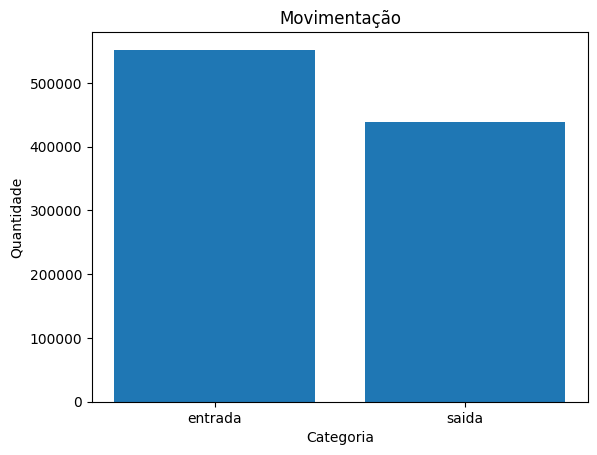

In [23]:
entrada = (dataset_revisado['saldo_movimentacao'] == 1).sum()
saida = (dataset_revisado['saldo_movimentacao']== -1).sum()

categorias = ['entrada', 'saida']
dados = [entrada, saida]

plt.bar(categorias,dados)
plt.title('Movimentação')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')

### grau_instrucao

In [24]:
dataset_revisado['grau_instrucao'].value_counts()

grau_instrucao
9     534859
8     182416
7     165529
80     82246
10     12246
11      5277
6       4775
5       1965
1        750
4        310
3        157
2        151
Name: count, dtype: int64

Observa-se uma grande quantidade de categorias, que pode ser reduzida cum um aumento da granularidade.

Categoria original:

1	Analfabeto
2	Até 5ª Incompleto
3	5ª Completo Fundamental
4	6ª a 9ª Fundamental
5	Fundamental Completo
6	Médio Incompleto
7	Médio Completo
8	Superior Incompleto
9	Superior Completo
10	Mestrado
11	Doutorado
80	Pós-Graduação completa

Redução de granularidade:

1	-> 1 - Até o fundamental
2	-> 1 - Até o fundamental
3	-> 1 - Até o fundamental
4	-> 1 - Até o fundamental
5	-> 1 - Até o fundamental
6	-> 2 - Até o Ensino Médio
7	-> 2 - Até o Ensino Médio
8	-> 3 - Até o Superior
9	-> 3 - Até o Superior
10	-> 4 - Até a Pós-Graduação
11	-> 4 - Até a Pós-Graduação
80	-> 4 - Até a Pós-Graduação


In [25]:
# Mapeamento para as categorias reduzidas
mapeamento = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 2,
    7: 2,
    8: 3,
    9: 3,
    10: 4,
    11: 4,
    80: 4
}

# Criando o novo atributo com a granularidade reduzida
dataset_revisado["grau_instrucao_reduzido"] = dataset_revisado["grau_instrucao"].map(mapeamento)

# Verificando a contagem das novas categorias
print(dataset_revisado["grau_instrucao_reduzido"].value_counts())


grau_instrucao_reduzido
Ensino Superior       717275
Ensino Médio          170304
Pós-Graduação          99769
Ensino Fundamental      2432
Sem escolaridade         901
Name: count, dtype: int64


In [ ]:
ctg = dataset_org['ano'].value_counts()
ctg

In [ ]:
# vendo quais são os valores da coluna mes
valores_unicos = dataset_orig['mes'].unique()
print(valores_unicos)

In [ ]:
#quais são os valores da coluna ano
valores_unicos = dataset_orig['ano'].unique()
print(valores_unicos)

In [ ]:
# Unindo os valores das duas colunas no formato aa-mm, porém ainda como string
dados['data'] = dados['mes'].astype(str).str.zfill(2) + '-' + dados['ano'].astype(str)

valores_unicos = dados['data'].unique()
print(valores_unicos)

In [ ]:
dados.head()

2) Remover colunas que não são relevantes na análise

In [ ]:
#deixei a coluna ano apenas com os últimos dois dígitos
dados['ano'] = dados['ano'].astype(str).str[-2:]

valores_unicos = dados['ano'].unique()
print(valores_unicos)

In [ ]:
# Remover a coluna ano e mes
dados = dados.drop('ano', axis=1)
dados = dados.drop('mes', axis=1)

In [ ]:
dados.head()

In [ ]:
# Remover as colunas 'coluna2' e 'coluna4' diretamente no DataFrame original
dados.drop(['id_municipio', 'cnae_2_subclasse', 'origem_informacao', 'indicador_fora_prazo'], axis=1, inplace=True)

In [ ]:
dados.head()

3) Analisar coluna cbo_2002:

In [ ]:
#Reduzir o grau de detalhamento aos quatro primeiros dígitos
dados['cbo_2002'] = dados['cbo_2002'].astype(str).str[:4]

In [ ]:
dados['cbo_2002'] = dados['cbo_2002'].astype('Int64')

In [ ]:
print(dados['cbo_2002'].dtype)

In [ ]:
valores_unicos = dados['cbo_2002'].unique()
print(valores_unicos)

In [ ]:
#os valores 2121 e 2120 não são correspondentes a este atributo, pois não há categorias relacionadas e podem ser registros errados.
dados_cbo2002 = dados[(dados['cbo_2002'] == 2121) | (dados['cbo_2002'] == 2120)]
dados_cbo2002

In [ ]:
dados = dados.drop(dados_cbo2002.index)

4) Analisando a coluna categoria:

In [ ]:
valores_unicos = dados['categoria'].unique()
print(valores_unicos)

In [ ]:
dados_categoria = dados[dados['categoria'] == 102]
dados_categoria

In [ ]:
# Escolhi remover o registro retornado pela categoria 102, pois representa uma inconsistência
dados.drop(dados[dados['categoria'] == 102].index, inplace=True)

In [ ]:
dados

In [ ]:
dados_categoria = dados[dados['categoria'] == 999]
dados_categoria

In [ ]:
dados_categoria = dados[dados['categoria'] == 101]
dados_categoria

In [ ]:
dados_categoria_102 = dados[dados['categoria'] == 103]
dados_categoria_102